# Projeto Módulo 01 - Bootcamp Data Science Aplicada

Autor / Data / Contatos


## ESCOPO DO PROJETO



### Justificativa

O módulo 01 do Bootcamp de Data Science Aplicada da Alura nos aproximou da análise de dados reais do DATASUS com a ajuda do Python e Pandas para limpeza e tratamento dos dados, possibilitando então a análise exploratória dos mesmos com o suporte do Matplotlib.

No módulo investigamos as despesas do SUS no território nacional a partir dos registros dos atendimentos e do processamento dos mesmos. As oscilações recorrentes desses registros nos levaram a investigar se havia alguma relação entre os picos de despesas e os picos de ocorrências de dengue. Afinal constatamos que existe uma aparente relação entre entre as despesas e as ocorrências sazonais de picos de dengue. Também foi possível perceber, em paralelo, como se manifestavam as despesas quando relacionadas com o tamanho da população de cada estado.

Nesse cenário preliminar surgiram algumas questões de interesse para investigação e aprofundamento:
- Qual o cenário **GERAL**, nos últimos anos, da relação entre despesas do SUS e o registro da população efetivamente atendida em cada Estado e Região do País? Qual a média de custo por habitante atendido em cada estado e região? Qual o comportamento dos dados quando comparamos os dados do Ceará com os 5 estados com maiores despesas do Brasil? Como se comporta o Ceará em relação a média do Nordeste?

- É possível espacializar a distribuição dos atendimentos e gastos do Estado do Ceará a **nível municipal?** Que municípios apresentaram maiores despesas e casos? É possível perceber, nesses municiṕios, uma relação entre aumento de despesas e sazonalidade de doenças? Que doenças apresentaram maior número de casos e despesas?

- Em sequência, é possível espacializar esses dados a **nível intra-municipal (Bairros, setores censitários e CEP)**? Onde estão localizados o maior número de casos e despesas do SUS no território da Região Metropolitana de Fortaleza? Existe uma confluência entre as zonas com mais casos e as condições urbanas dessas zonas?

### Problema / Hipótese

### Objetivo Geral

Identificar o tipo de ocorrência que levou a mais despesas do SUS no país nos últimos 10 anos, comparando com as despesas promovidas pelo Covid-19 entre março de 2020 e março de 2021, buscando espacializar esses dados no território da Região Metropolitana de Fortaleza.

### Objetivos Específicos

- Precisão no uso da estatística para exploração dos dados;
- Elegância, simplicidade e clareza no uso da sintaxe do Python para o tratamento dos dados;
- Boa comunicação gráfica dos resultados obtidos (DataViz);
- Storytelling fluido na apresentação do estudo;
<!---
    - Storytelling > Análises > Parte Técnica (Estatística e Python/Gráficos);
    - O mais importante é a conexão entre todas essas coisas: E se a sua vovó estivesse lendo seu relatório? Transformar em uma coisa tangível para quem é leigo: descrever
    - Capricha no conjunto como um todo e reduz a complexidade do projeto. É um projeto, não uma tese.--->

### Bases de dados consultadas

- [DATASUS](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi)
- [IntegraSUS-CE](https://integrasus.saude.ce.gov.br/#/indicadores) (Dicionário dos dados: [GitHub](https://github.com/integrasus/api-covid-ce))
- [Brasil.IO](https://brasil.io/home/)
- IBGE - [Dados quantitativos](https://ftp.ibge.gov.br/) e [Dados Geoespaciais](https://geoftp.ibge.gov.br/)
- CEP?

### Principais variáveis de interesse:

- Dados Quantitativos:
    - Despesas do SUS;
    - População atendida;
    - Índice de despesa / Habitante atendido;
    - Doença responsável por maior índice de despesa

- Escalas Territoriais:
    - Unidades da Federação;
    - Municípios do território de referência (Estado com maiores despesas do SUS) e Municípios do território investigado (Ceará);
    - Região Metropolitana de Fortaleza: Municípios, Bairros, Setores Censitários, CEPs.

- Escala temporal:
    - Últimos 10 anos - Geral de casos de enfermidades;
    - Março de 2020 a Março de 2021 - Para os casos de COVID.

### Método

### Desenvolvimento

- Primeiras análises da maneira mais básica possível;
- Começar a explorar e plotar para permitir brotar primeiras ideias e hipoteses.

### 1. Identificar a relação entre as despesas do SUS e a população efetivamente atendida por Unidade da Federação e Região do país, média de custo por habitante atendido, comparar o Ceará com as 5 maiores despesas do Brasil e em relação à média do nordeste.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Descrição dos dados utilizados:

- **A145424189_28_143_208.csv**: Procedimentos hospitalares do SUS, por local de internação no Brasil. Valor total gasto por Unidade da Federação e Ano/mês atendimento no período de Jan/2008 a Mar/2021. Fonte:[DATASUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def).
- **A145705189_28_143_208.csv**: Procedimentos hospitalares do SUS, por local de internação no Brasil. Quantidade de Internações por Unidade da Federação e Ano/mês atendimento no período de Jan/2008 a Mar/2021. Fonte: [DATASUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def).
- **A144115189_28_143_208.csv**: Procedimentos hospitalares do SUS, por local de internação no Brasil. Autorizações para Internação Hospitalar (AIH) aprovadas por Unidade da Federação e Ano/mês atendimento no período de Jan/2008 a Mar/2021. Fonte: [DATASUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) & [Indicadores Básicos para a Saúde no Brasil: conceitos e aplicações](../../references/modulo_01/indicadores_DATASUS.pdf).
- **A144712189_28_143_208.csv**: Procedimentos hospitalares do SUS, por local de internação no Brasil. Valor médio AIH por Unidade da Federação e Ano/mês atendimento no período de Jan/2008 a Mar/2021. Valor médio pago  a partir das Autorizações para Internação Hospitalar (AIH). Fonte: [DATASUS](http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qiuf.def) & [Indicadores Básicos para a Saúde no Brasil: conceitos e aplicações](../../references/modulo_01/indicadores_DATASUS.pdf).
- Valor médio pago, na especialidade, a partir das Autorizações para Internação Hospitalar (AIH).

### 1.01 - Estudo DESPESAS SUS por UF e Ano/mês de Atendimento nos últimos 10 anos.

In [2]:
dados_despesas = pd.read_csv("../../data/projeto_01/A145424189_28_143_208.csv", encoding = "ISO-8859-1",
                   skiprows = 3, sep = ";", skipfooter = 12,
                   thousands = ".", decimal = ",")
dados_despesas

<ipython-input-2-8697783d49f5>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_despesas = pd.read_csv("../../data/projeto_01/A145424189_28_143_208.csv", encoding = "ISO-8859-1",


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,...,1.047999e+07,1.143347e+07,8.876900e+06,8.167253e+06,8.759014e+06,9.003402e+06,8.414691e+06,6.039420e+06,4.732441e+06,9.964113e+08
1,12 Acre,-,-,-,-,-,-,-,-,-,...,4.053085e+06,3.658266e+06,3.470409e+06,3.267919e+06,3.393958e+06,3.711661e+06,3.005561e+06,2.272734e+06,1.137342e+06,4.500485e+08
2,13 Amazonas,-,-,-,-,-,-,-,-,-,...,1.930374e+07,1.868723e+07,1.862863e+07,1.872825e+07,2.045157e+07,2.154606e+07,2.443906e+07,1.367936e+07,6.799061e+06,1.917248e+09
3,14 Roraima,-,-,-,-,-,-,-,-,-,...,3.192075e+06,3.262354e+06,2.978629e+06,3.313297e+06,3.527263e+06,3.125022e+06,3.209324e+06,3.044799e+06,2.381844e+06,3.288770e+08
4,15 Pará,-,-,-,-,-,-,-,-,-,...,4.049635e+07,3.879339e+07,3.696595e+07,3.840662e+07,3.704303e+07,3.691444e+07,3.388777e+07,2.334322e+07,1.306956e+07,4.705309e+09
5,16 Amapá,-,-,-,-,-,-,-,-,-,...,2.536643e+06,2.702550e+06,2.533445e+06,2.762003e+06,2.714711e+06,2.826612e+06,2.513766e+06,1.534733e+06,9.891554e+05,3.098601e+08
6,17 Tocantins,-,-,-,-,-,-,-,-,-,...,7.934629e+06,6.488928e+06,4.229377e+06,1.853045e+06,5.090097e+05,6.893834e+05,3.476268e+05,4.165343e+05,9.287568e+05,1.020028e+09
7,21 Maranhão,-,-,-,-,-,-,-,-,-,...,3.399135e+07,3.271126e+07,3.198571e+07,3.443046e+07,3.244680e+07,3.092707e+07,2.679770e+07,2.326025e+07,1.729451e+07,3.871069e+09
8,22 Piauí,-,-,-,-,-,-,-,-,-,...,2.581744e+07,2.245226e+07,2.063700e+07,2.032681e+07,2.002200e+07,1.935222e+07,1.843728e+07,1.363601e+07,9.542152e+06,2.280889e+09
9,23 Ceará,-,-,-,-,-,-,-,-,-,...,5.844849e+07,5.511819e+07,5.382749e+07,5.467965e+07,5.402629e+07,5.027155e+07,4.374343e+07,3.018695e+07,1.717315e+07,6.591837e+09


In [3]:
pd.options.display.float_format = "{:,.2f}".format
dados_despesas.mean()

2007/Ago         304,952.77
2007/Set         788,145.26
2007/Out       2,440,162.96
2007/Nov       5,517,354.05
2007/Dez      12,337,159.42
                 ...       
2020/Dez      53,772,909.13
2021/Jan      49,474,107.60
2021/Fev      38,992,424.23
2021/Mar      24,163,712.88
Total      6,388,205,992.19
Length: 165, dtype: float64

- Colocar Unidades da Federação como índice e dropar a coluna "Total"

In [4]:
colunas_usaveis_despesas = dados_despesas.mean().index.tolist()
colunas_usaveis_despesas.insert(0, "Unidade da Federação")
colunas_usaveis_despesas

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


## <p style="color:red">Dúvida 01</p>
- <p style="color:red">Ainda tenho muita dúvida sobre a dinâmica de definição de colunas selecionadas e seu reuso num novo DataSet criado, como vemos a seguir no código.</p>
- <p style="color:red">Preciso me aprofundar também na forma como Listas, Séries e DataFrames são manuseados no estudo de dados com o Pandas.</p>

In [5]:
usaveis_despesas = dados_despesas[colunas_usaveis_despesas]
usaveis_despesas = usaveis_despesas.set_index("Unidade da Federação")
usaveis_despesas = usaveis_despesas.drop("Total", axis = 1)
usaveis_despesas.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,"4,209.37","16,397.03","133,645.19","346,912.84","711,758.31","1,829,559.71","1,940,792.63","1,955,721.68","2,143,353.81","2,280,382.58",...,"10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59","4,732,441.04"
12 Acre,"10,470.07","14,001.71","86,200.85","301,323.68","769,612.36","1,731,744.62","1,743,978.66","2,057,439.02","2,057,829.69","2,226,577.93",...,"3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90","1,137,341.65"
13 Amazonas,"35,752.72","45,570.64","416,012.30","2,020,381.79","5,949,408.99","11,419,210.08","7,934,652.10","8,641,517.13","8,531,576.49","9,079,902.15",...,"18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06","6,799,060.80"
14 Roraima,"4,785.91","11,858.63","43,852.67","369,328.51","470,676.43","808,448.39","771,687.83","876,091.18","896,952.53","1,027,288.73",...,"3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77","2,381,844.31"
15 Pará,"181,159.29","433,414.74","1,893,197.50","5,105,406.44","13,162,823.43","21,762,104.16","20,126,081.01","22,149,375.82","23,436,682.75","23,861,080.80",...,"40,994,545.21","40,496,349.97","38,793,393.54","36,965,951.76","38,406,616.21","37,043,032.10","36,914,437.92","33,887,773.65","23,343,222.94","13,069,564.31"


- Selecionar apenas dos dados do período de 2011/Fev a 2021/Fev

Documentação consultada:[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html)

In [6]:
#usaveis.columns[42:163]
colunas_pesquisadas_despesas = usaveis_despesas.columns[42:163]
colunas_pesquisadas_despesas = colunas_pesquisadas_despesas.insert(0, "Unidade da Federação")

colunas_usaveis_despesas = dados_despesas[colunas_pesquisadas_despesas]
colunas_usaveis_despesas = colunas_usaveis_despesas.set_index("Unidade da Federação")
colunas_usaveis_despesas.head()

,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,...,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,"4,293,085.61","4,674,947.02","5,087,527.81","4,724,192.54","4,690,112.05","4,319,488.17","4,778,472.22","4,202,805.84","4,372,265.77","4,389,025.81",...,"8,957,706.45","10,993,332.84","10,479,989.36","11,433,467.56","8,876,900.39","8,167,253.19","8,759,013.71","9,003,402.23","8,414,690.60","6,039,419.59"
12 Acre,"2,473,515.82","2,801,446.23","2,672,803.31","3,135,521.30","2,719,044.65","2,814,550.89","2,923,529.36","2,804,546.95","2,773,202.98","2,711,168.25",...,"2,940,827.86","3,914,823.86","4,053,085.41","3,658,265.59","3,470,409.45","3,267,918.69","3,393,958.27","3,711,660.71","3,005,561.16","2,272,733.90"
13 Amazonas,"9,461,664.54","10,954,545.77","10,529,645.04","10,105,494.01","9,966,359.03","9,972,847.16","9,965,893.92","9,861,030.02","10,206,641.46","10,735,915.35",...,"19,625,325.21","18,433,057.47","19,303,743.16","18,687,233.58","18,628,627.49","18,728,251.20","20,451,573.77","21,546,059.48","24,439,059.57","13,679,358.06"
14 Roraima,"1,220,176.72","1,276,120.86","1,379,942.19","1,679,122.67","1,770,324.67","1,646,157.39","1,656,379.50","1,802,450.34","1,856,131.44","1,655,521.98",...,"2,921,522.16","3,300,012.98","3,192,075.41","3,262,354.34","2,978,629.22","3,313,296.78","3,527,263.23","3,125,021.90","3,209,323.68","3,044,798.77"
15 Pará,"26,170,892.65","29,193,123.80","27,294,759.31","27,759,327.87","26,458,847.52","25,646,178.94","27,348,214.64","27,122,078.56","27,151,997.82","27,076,766.56",...,"43,327,731.71","40,994,545.21","40,496,349.97","38,793,393.54","36,965,951.76","38,406,616.21","37,043,032.10","36,914,437.92","33,887,773.65","23,343,222.94"


## <p style="color:red">Dúvida 02</p>
<p style="color:red">Preciso entender melhor aqui como se organiza a informação que define a griação de um gráfico.</p>

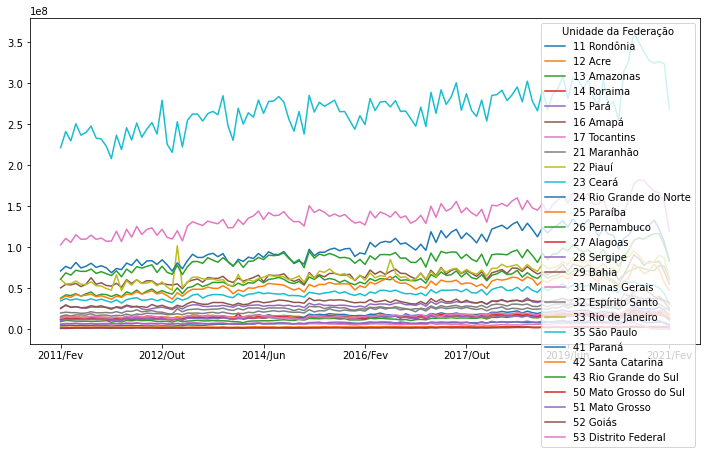

In [9]:
colunas_usaveis_despesas.T.plot(figsize = (12, 6))
plt.show()

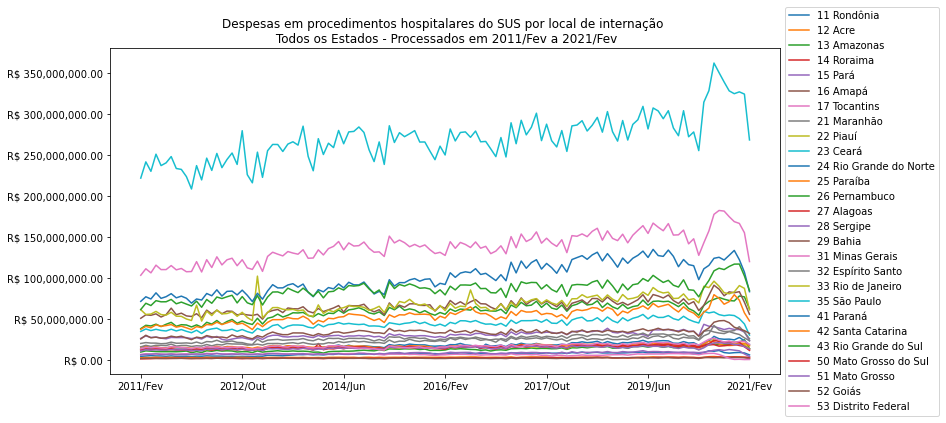

In [10]:
estados = "Todos os Estados"
ano_selecionado = "2011/Fev a 2021/Fev"

ax_dados_despesas = colunas_usaveis_despesas.T.plot(figsize = (12, 6))
ax_dados_despesas.legend(loc = 6, bbox_to_anchor = (1, 0.5))
ax_dados_despesas.yaxis.set_major_formatter(ticker.StrMethodFormatter("R$ {x:,.2f}"))
plt.title("Despesas em procedimentos hospitalares do SUS por local de internação \n {} - Processados em {}".format(estados, ano_selecionado))
#plt.savefig("../../reports/figures/modulo_01/desafio02_1.jpg", dpi=150, bbox_inches="tight")
plt.show()

A princípio não é possível tirar muitas conslusões com os dados anteriores pois temos apenas o fluxo do despesas nas Unidades de Federação do Brasil e no gráfico os dados se apresentam de maneira confusa: não é possível identificar, por exemplo, que estados apresentam maiores despesas e como essas despesas estão rateadas entre a população efetivamente atendida em cada localidade. Nesse sentido poderia ser verificado como esses dados estão se comportando quando isolados segundo as seguintes restrições:

- Apenas no mês de entrada e saída;
- Desvio dos dados a partir da média em um mês isolado;
- Apresentar os 5 Estados com maiores despesas;
- Apresentar a média de despesas por região;
- Comparar essas informações com o caso do Estado do Ceará.
- Um Dashboard síntese com essas informações, incluso tabelas se for necessário, pode facilitar a descrição das informações de despesas.

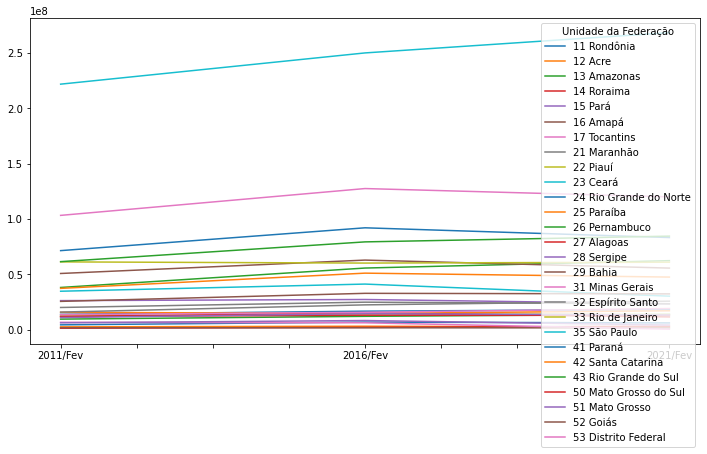

In [58]:
colunas_usaveis_despesas[["2011/Fev", "2016/Fev", "2021/Fev"]].T.plot(figsize = (12, 6))
plt.show()

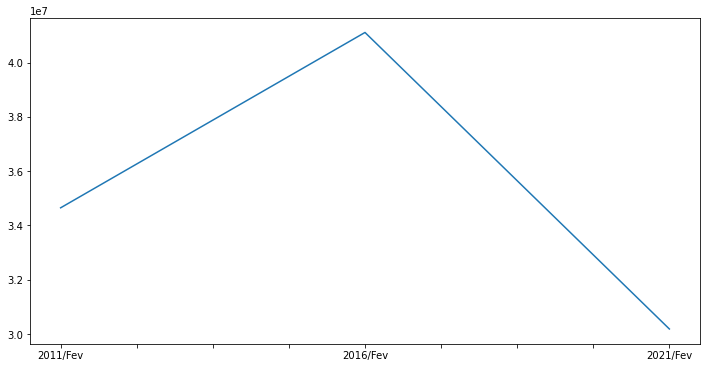

In [64]:
colunas_usaveis_despesas[["2011/Fev", "2016/Fev", "2021/Fev"]].loc["23 Ceará"].T.plot(figsize = (12, 6))
plt.show()

### 1.02 - Estudo da quantidade de internações por UF e Ano/mês nos últimos 10 anos.

In [11]:
dados_internacoes = pd.read_csv("../../data/projeto_01/A145705189_28_143_208.csv", encoding = "ISO-8859-1",
                   skiprows = 3, sep = ";", skipfooter = 12,
                   thousands = ".", decimal = ",")
dados_internacoes

<ipython-input-11-83583eb9abc2>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dados_internacoes = pd.read_csv("../../data/projeto_01/A145705189_28_143_208.csv", encoding = "ISO-8859-1",


,Unidade da Federação,2007/Jan,2007/Fev,2007/Mar,2007/Abr,2007/Mai,2007/Jun,2007/Jul,2007/Ago,2007/Set,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
0,11 Rondônia,-,1,-,-,-,-,-,7,42,...,8376,8848,8379,8791,8865,8362,7221,4779,2106,1387140
1,12 Acre,1,-,-,-,-,1,-,5,17,...,3549,3574,3724,3973,3834,3821,3588,2898,1788,637069
2,13 Amazonas,3,2,-,1,-,-,1,59,69,...,15417,15709,15727,15796,15424,16213,16344,10777,6256,2248754
3,14 Roraima,-,-,-,-,-,1,-,14,8,...,3080,3332,3302,3404,3248,3358,3356,2855,2154,465989
4,15 Pará,8,6,-,-,1,1,4,404,798,...,36010,37071,36673,38418,37120,35613,33495,24261,14718,6479075
5,16 Amapá,-,-,-,-,1,3,25,75,272,...,2746,2993,2822,3112,2890,2968,2950,1839,1161,478668
6,17 Tocantins,-,1,-,-,-,1,1,8,48,...,6039,4805,3848,2251,475,407,433,480,650,1177323
7,21 Maranhão,4,6,-,1,3,-,17,461,1103,...,32088,32841,33038,34964,33217,30294,28989,24738,15003,5374355
8,22 Piauí,-,1,-,-,1,-,4,137,372,...,14643,15099,15925,16473,15871,15258,15033,11497,8028,2871888
9,23 Ceará,1,2,-,-,-,-,5,416,528,...,37583,37203,38548,39338,37830,35077,32157,23559,14977,6341079


## <p style="color:red">Dúvida 03</p>
<p style="color:red">Ainda tenho uma dúvida aqui sobre o papel do ".mean()" na definição dos índices dos dados.</p>

Checar documentação: [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [59]:
colunas_usaveis_internacoes = dados_internacoes.mean().index.tolist()
colunas_usaveis_internacoes.insert(0, "Unidade da Federação")
#colunas_usaveis_internacoes

usaveis_internacoes = dados_internacoes[colunas_usaveis_internacoes]
usaveis_internacoes = usaveis_internacoes.set_index("Unidade da Federação")
usaveis_internacoes = usaveis_internacoes.drop("Total", axis = 1)
usaveis_internacoes.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,7,42,105,393,1828,5242,5562,5105,5175,5148,...,7638,8376,8848,8379,8791,8865,8362,7221,4779,2106
12 Acre,5,17,100,573,1490,3735,3723,4163,4223,4471,...,3029,3549,3574,3724,3973,3834,3821,3588,2898,1788
13 Amazonas,59,69,565,2780,9979,13628,13828,14869,14323,14904,...,13943,15417,15709,15727,15796,15424,16213,16344,10777,6256
14 Roraima,14,8,73,818,1121,1898,1739,2047,2211,2415,...,2974,3080,3332,3302,3404,3248,3358,3356,2855,2154
15 Pará,404,798,3202,8690,24743,43817,40225,43274,44734,44894,...,32351,36010,37071,36673,38418,37120,35613,33495,24261,14718


In [52]:
#usaveis_internacoes.columns[42:163]
colunas_pesquisadas_internacoes = usaveis_internacoes.columns[42:163]
colunas_pesquisadas_internacoes = colunas_pesquisadas_internacoes.insert(0, "Unidade da Federação")

colunas_usaveis_internacoes = dados_internacoes[colunas_pesquisadas_internacoes]
colunas_usaveis_internacoes = colunas_usaveis_internacoes.set_index("Unidade da Federação")
colunas_usaveis_internacoes.head()

,2011/Fev,2011/Mar,2011/Abr,2011/Mai,2011/Jun,2011/Jul,2011/Ago,2011/Set,2011/Out,2011/Nov,...,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,7785,8691,8836,8274,8195,7814,8681,7918,8245,8254,...,7434,7638,8376,8848,8379,8791,8865,8362,7221,4779
12 Acre,4129,4573,4344,4859,4355,4311,4304,4234,4118,4148,...,2818,3029,3549,3574,3724,3973,3834,3821,3588,2898
13 Amazonas,13488,15187,14388,13665,13539,13345,13716,13051,13756,14317,...,13272,13943,15417,15709,15727,15796,15424,16213,16344,10777
14 Roraima,1984,2077,2185,2620,2596,2568,2735,2837,2702,2669,...,2884,2974,3080,3332,3302,3404,3248,3358,3356,2855
15 Pará,42044,46579,42490,43492,41299,38734,43303,42302,41776,42089,...,31523,32351,36010,37071,36673,38418,37120,35613,33495,24261


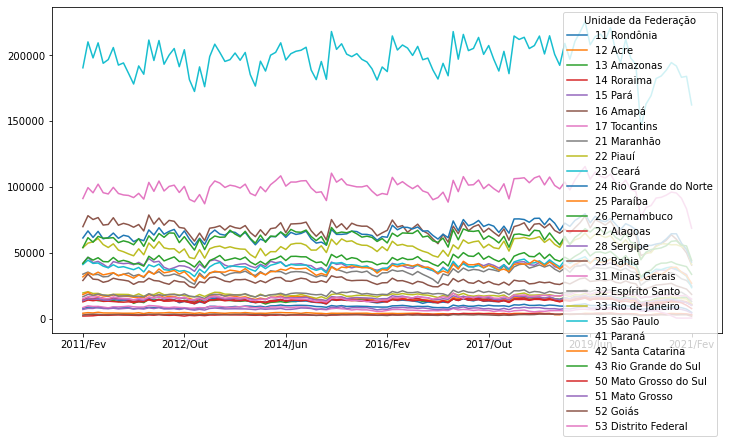

In [53]:
colunas_usaveis_internacoes.T.plot(figsize = (12, 6))
plt.show()

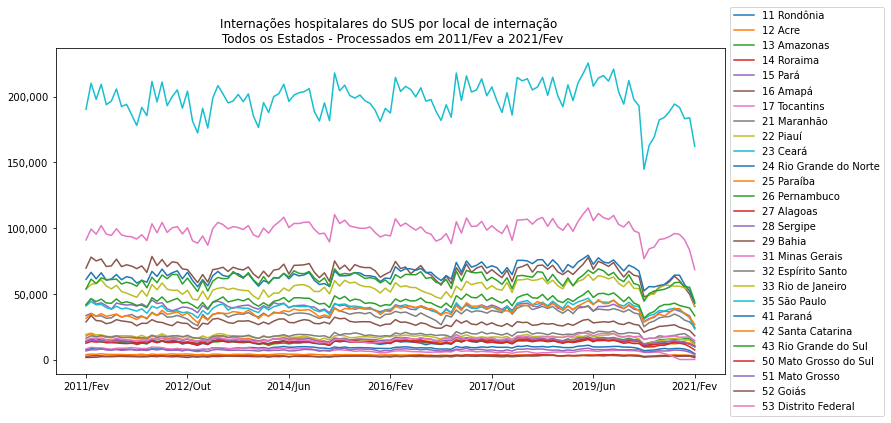

In [54]:
estados = "Todos os Estados"
ano_selecionado = "2011/Fev a 2021/Fev"

ax_dados_internacoes = colunas_usaveis_internacoes.T.plot(figsize = (12, 6))
ax_dados_internacoes.legend(loc = 6, bbox_to_anchor = (1, 0.5))
ax_dados_internacoes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
plt.title("Internações hospitalares do SUS por local de internação \n {} - Processados em {}".format(estados, ano_selecionado))
#plt.savefig("../../reports/figures/modulo_01/desafio02_1.jpg", dpi=150, bbox_inches="tight")
plt.show()

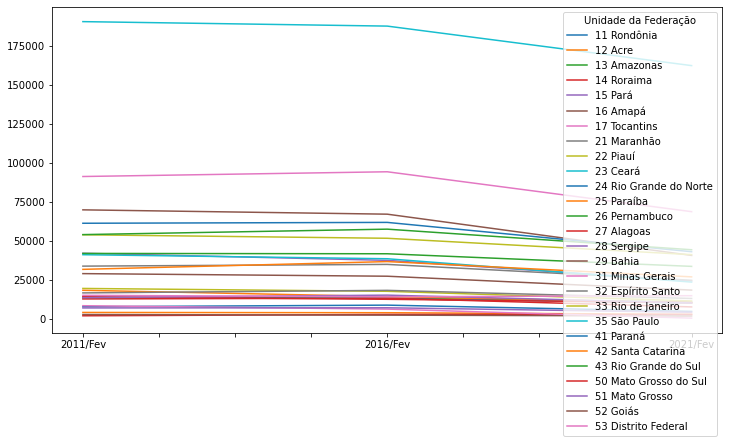

In [63]:
usaveis_internacoes[["2011/Fev", "2016/Fev","2021/Fev"]].T.plot(figsize = (12, 6))
plt.show()

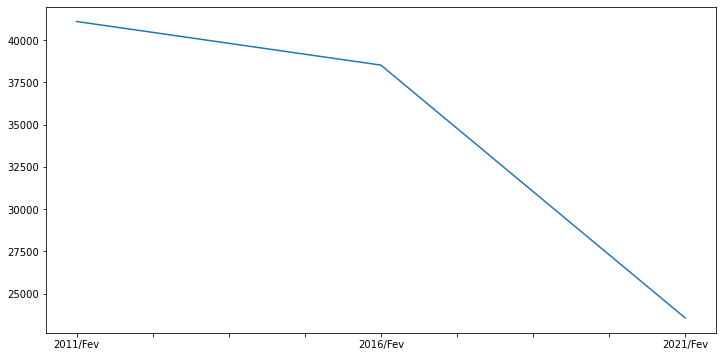

In [62]:
usaveis_internacoes[["2011/Fev", "2016/Fev","2021/Fev"]].loc["23 Ceará"].T.plot(figsize = (12, 6))
plt.show()

### Resultados

### Discussão / Conclusões

### Referências Bibliográficas

## Checklist Projeto

### Instruções para o projeto/notebook:
------
- [ ] Capriche nas análise;
- [ ] Escreva conclusões e hipóteses (ainda que inconclusivas);
- [ ] Resumir os pontos que julgar mais interessantes do projeto;
- [ ] Delimitar Escopo do Projeto de acordo com o tempo e o aprendizado do módulo;
- [ ] Utilizar base de dados sugerida;
- [ ] Estruturar o projeto de maneira organizada e lógica;
- [ ] Criar um notebook com Enredo atraente e coerente;
- [ ] Tratar e descrever os dados quando necessário;
- [ ] Fundamentar o cruzamento dos dados se utilizar outras bases;
- [ ] Aplicar técnicas de configurações de gráficos para torná-los compreensíveis e para criar argumentações embasadas neles;
- [ ] Se possível pesquisar para ir além do apresentado no módulo;
- [ ] Fazer uma conclusão que relate as limitações do projeto, dando ideias para projetos futuros e apresentando os principais resultados da análise;
- [ ] Citar e trazer as fontes de todo o conteúdo que apresentar e não for de sua autoria.

### Instruções para Github e REAMDME.md
------
- [ ] Marcar a Alura no projeto com "#alura", "#bootcampDS" e "#bootcampDataScience";
- [ ] Capa do README;
- [ ] Resumo do projeto;
- [ ] Apresentação da estrutura do projeto;
    - [ ] Fontes de dados;
    - [ ] Objetivos;
    - [ ] Conclusões.